<a href="https://colab.research.google.com/github/edwardsongwonyoung/sudaenge-i/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

In [ ]:
df=pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5728,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5729,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5730,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target = df.iloc[:, 0].values
value = df.iloc[:, 1:].values
print(target)
print(value)

[1 0 1 ... 7 1 9]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... nan nan nan]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(value, target, test_size=0.2, random_state=42)
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
#one hot encoding

In [ ]:
learning_rate = 0.00062
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), input_shape=(28,28,1),activation='relu',kernel_initializer='he_uniform',padding="same"))
for a in range(3):
    model.add(tf.keras.layers.Conv2D(filters=62, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform',padding="same"))
    model.add(tf.keras.layers.Dropout(0.38))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=62, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))
model.summary()
#여러 시도를 통해 얻은 값을 바탕으로 모델을 만듭니다.
#conv2D layer는 Convolution하게 이미지를 처리해줍니다.
#relu는 음수 값에는 0의 가중치를 양수 값에는 1의 가중치를 곱하여 값을 처리합니다.
#kernel_initializer='glorot_uniform'는 Xavier Initialization이라고도 불리며 이전 노드와 다음 노드의 개수를 이용하여 가중치를 초기화합니다.
#padding="same"은 테두리에 0의 값을 추가시켜 어디가 모서리인지 알게 하고 output의 크기를 같게 해줍니다 padding="valid"라면 아무런 값도 추가되지 않습니다.
#Dropout은 특정 layer에 너무 많은 가중치가 쏠리는 것을 방지하여 랜덤하게 layer간의 연결을 해제하는 것입니다.
#MaxPooling2D layer는 n,n사이즈의 사각형안에 있는 값 중 가장 큰 값만을 이용하여 새로운 이미지를 만듭니다.
#Flatten layer는 conv2d를 거치고 나온 2차원의 데이터를 1차원의 데이터로 펴주어 dense layer를 사용할 수 있게 합니다.
#마지막으로 softmax를 사용한다면 units개수의 target이 있을 때 1번째, 3번째 등 어디의 값일 확률이 높은지에 따라 [0,0,0,1,0,0,0,0,0,0]와 같은 형식으로 처리됩니다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        200       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 62)        11222     
                                                                 
 dropout (Dropout)           (None, 28, 28, 62)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 62)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 62)          34658     
                                                                 
 dropout_1 (Dropout)         (None, 9, 9, 62)          0         
                                                        

1/1 [==============================] - 0s 441ms/step
레이어 1 출력 형태: (1, 28, 28, 20)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


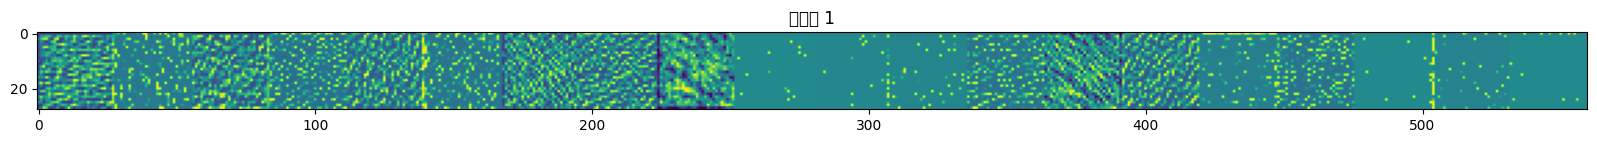

레이어 2 출력 형태: (1, 28, 28, 62)


<ipython-input-8-400960ee9f31>:42: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-8-400960ee9f31>:45: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


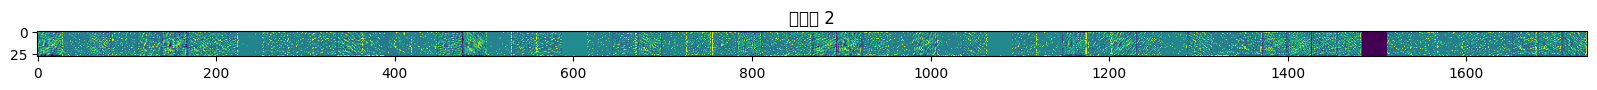

레이어 3 출력 형태: (1, 28, 28, 62)


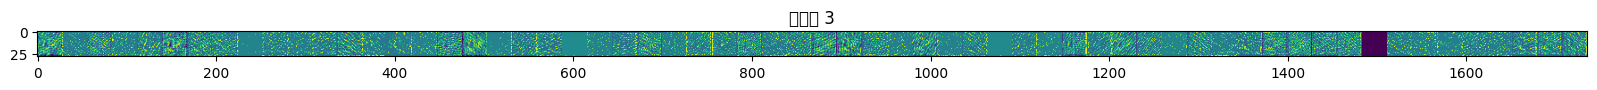

레이어 4 출력 형태: (1, 9, 9, 62)


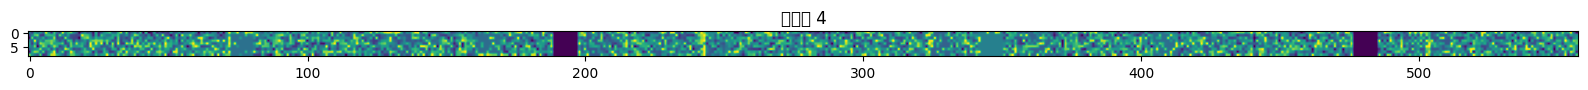

레이어 5 출력 형태: (1, 9, 9, 62)


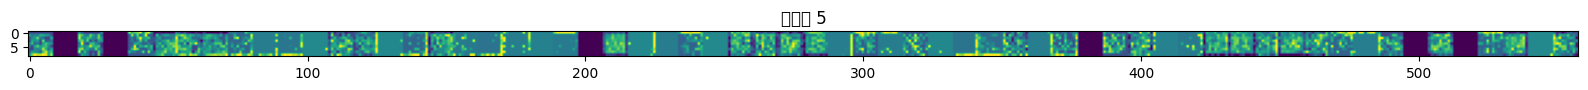

레이어 6 출력 형태: (1, 9, 9, 62)


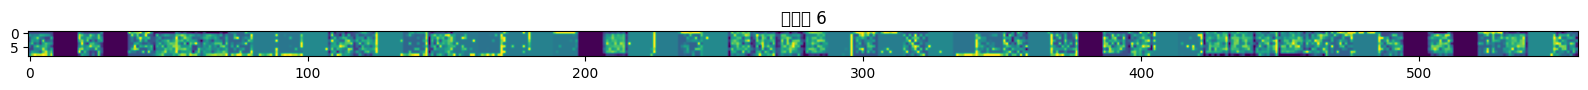

레이어 7 출력 형태: (1, 3, 3, 62)


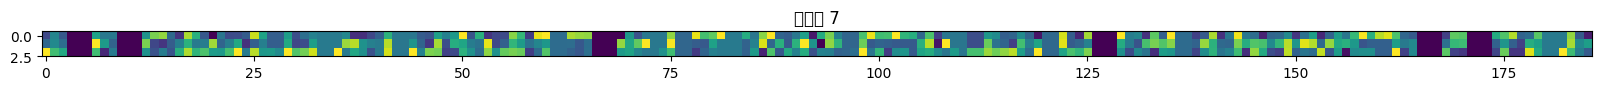

레이어 8 출력 형태: (1, 3, 3, 62)


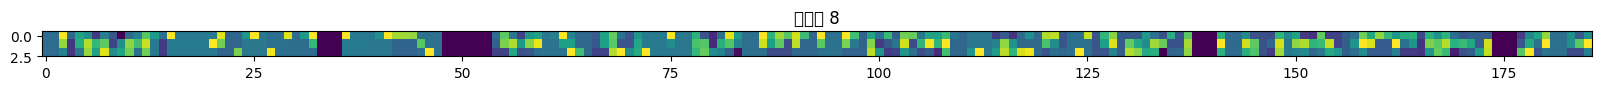

레이어 9 출력 형태: (1, 3, 3, 62)


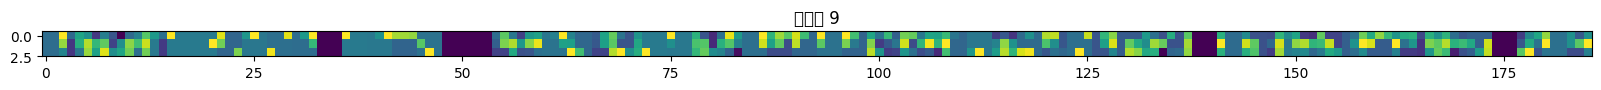

레이어 10 출력 형태: (1, 1, 1, 62)


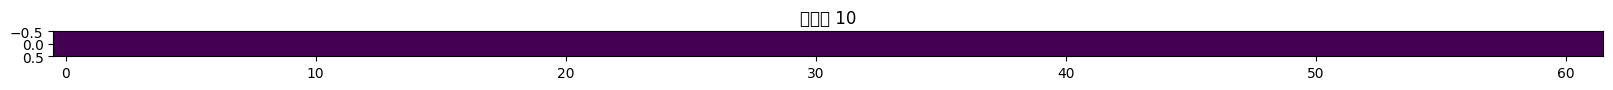

레이어 11 출력 형태: (1, 62)


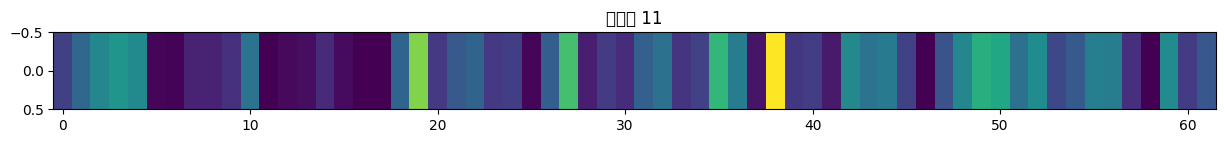

레이어 12 출력 형태: (1, 62)


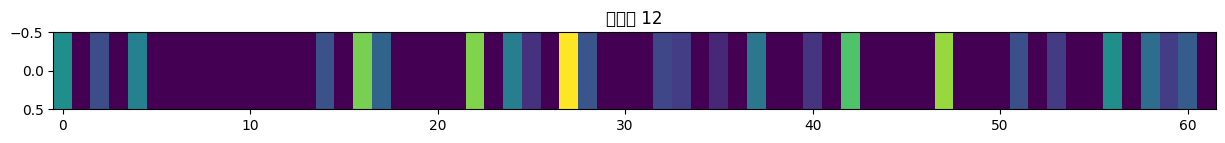

레이어 13 출력 형태: (1, 10)


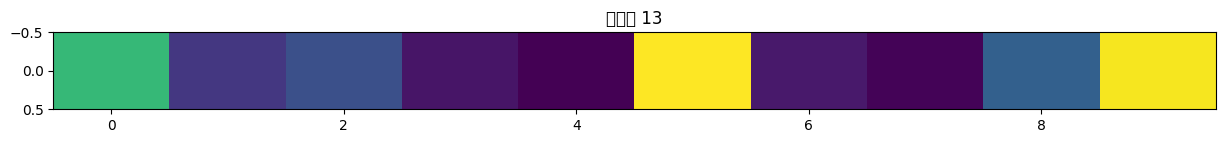

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 모델 생성
model = tf.keras.Sequential()

# 첫 번째 Conv2D 레이어 추가
model.add(tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform', padding="same"))

# 3번 반복하여 Conv2D, Dropout, MaxPooling2D 레이어 추가
for a in range(3):
    model.add(tf.keras.layers.Conv2D(filters=62, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
    model.add(tf.keras.layers.Dropout(0.38))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

# Flatten 레이어 추가
model.add(tf.keras.layers.Flatten())

# Dense 레이어 추가
model.add(tf.keras.layers.Dense(units=62, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

# 무작위 숫자 이미지 생성 (28x28 크기의 이미지)
random_image = np.random.rand(28, 28, 1)

# 모델 각 레이어 출력 시각화 함수
def visualize_layer_outputs(model, image):
    outputs = [layer.output for layer in model.layers]
    intermediate_model = tf.keras.Model(inputs=model.input, outputs=outputs)
    intermediate_outputs = intermediate_model.predict(np.expand_dims(image, axis=0))

    for i, output in enumerate(intermediate_outputs):
        print(f"레이어 {i+1} 출력 형태: {output.shape}")
        if len(output.shape) == 4:  # Conv2D 출력 시각화
            num_filters = output.shape[-1]
            size = output.shape[1]
            display_grid = np.zeros((size, size * num_filters))
            for j in range(num_filters):
                x = output[0, :, :, j]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, j * size : (j + 1) * size] = x
            scale = 20. / num_filters
            plt.figure(figsize=(scale * num_filters, scale))
            plt.title(f'레이어 {i+1}')
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
        elif len(output.shape) == 2:  # Dense 레이어 출력 시각화
            plt.figure(figsize=(15, 1))
            plt.title(f'레이어 {i+1}')
            plt.grid(False)
            plt.imshow(output, aspect='auto', cmap='viridis')
        plt.show()

visualize_layer_outputs(model, random_image)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), metrics=['accuracy'])
#adam과 RMSprop이 있었으나 RMSprop이 조금 더 나은 성능을 보여주었습니다.

In [ ]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)
#tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 30, verbose=1)]
#처음에는 EarlyStopping을 사용하였지만 데이터가 적어 overfitting이 되기 어려운 환경이라고 생각되어 ModelCheckpoint를 사용하였습니다.
#ModelCheckpoint는 val_loss를 모니터 하며 가장 최상의 값을 가진 모델을 model.h5파일에 업데이트합니다.

In [ ]:
history = model.fit(x_train, y_train, batch_size=100, epochs=100,validation_data =(x_test,y_test),callbacks=callbacks,verbose=1)
#verbose를 0으로 하면 기록이 안보입니다.
#verbose를 1로 하면 학습이 얼마정도 되었는지, loss, val_loss, accuracy, val_accuracy등이 표시됩니다.
#verbose를 2로 하면 loss, val_loss, accuracy, val_accuracy등만 표시됩니다.

Epoch 1/100
46/46 [==============================] - 20s 420ms/step - loss: nan - accuracy: 0.1529 - val_loss: nan - val_accuracy: 0.1081
Epoch 2/100
46/46 [==============================] - 15s 326ms/step - loss: nan - accuracy: 0.0951 - val_loss: nan - val_accuracy: 0.1081
Epoch 3/100
46/46 [==============================] - 15s 323ms/step - loss: nan - accuracy: 0.0951 - val_loss: nan - val_accuracy: 0.1081
Epoch 4/100
46/46 [==============================] - 14s 306ms/step - loss: nan - accuracy: 0.0951 - val_loss: nan - val_accuracy: 0.1081
Epoch 5/100
46/46 [==============================] - 17s 365ms/step - loss: nan - accuracy: 0.0951 - val_loss: nan - val_accuracy: 0.1081
Epoch 6/100
46/46 [==============================] - 14s 307ms/step - loss: nan - accuracy: 0.0951 - val_loss: nan - val_accuracy: 0.1081
Epoch 7/100
46/46 [==============================] - 15s 323ms/step - loss: nan - accuracy: 0.0951 - val_loss: nan - val_accuracy: 0.1081
Epoch 8/100
46/46 [===============

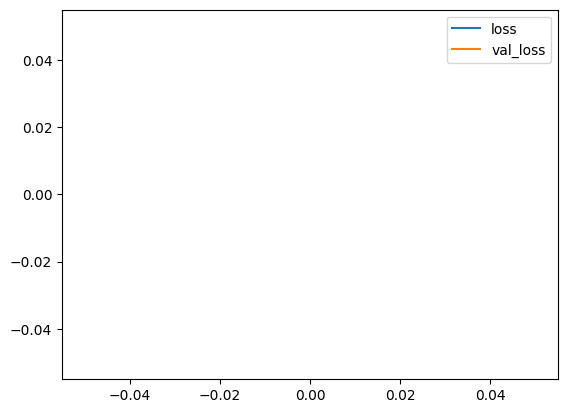

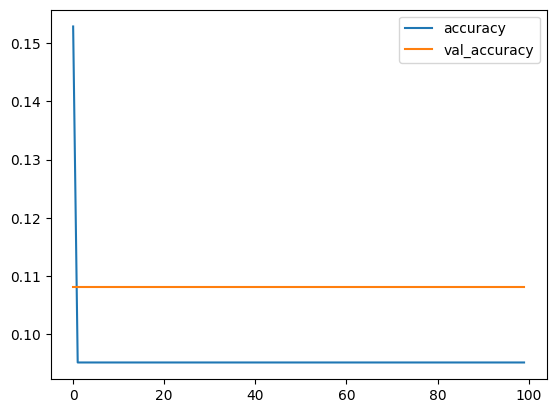

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
#각 값들이 어떻게 변하였는지를 살펴보고 혹시나 오버피팅이 되었는지 확인합니다.

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
#one hot enciding부분입니다.

In [ ]:
model = tf.keras.models.load_model('./model.h5')
#ModelCheckpoint를 사용하여 최고의 값을 보여주었던 모델을 불러옵니다.

OSError: No file or directory found at ./model.h5

In [ ]:
test = pd.read_csv("/content/test.csv").values
test = test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_pred = model.predict(test).argmax(axis=1)
#모델을 이용하여 값을 예측하는 부분입니다.

In [ ]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': y_pred})
submission.to_csv("submission.csv", index = False)
#dataframe을 csv형식으로 만들어 submission을 만듭니다.